<a href="https://colab.research.google.com/github/mubashirrind123work-gif/-car_price_prediction/blob/main/Copy_of_IBA_progect(heart_disease)_ipnynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Save model
import joblib

# Plot settings
plt.style.use('seaborn-v0_8')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [7]:
import pandas as pd
import zipfile

# Unzip the archive (1).zip file to extract heart.csv
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
target_col = "target"   # اگر آپ کے ڈیٹا میں target کا نام target ہے

df[target_col] = df[target_col].apply(lambda x: 1 if x > 0 else 0)
df[target_col].value_counts()

,count
target,
1,526
0,499


In [11]:
# اگر target کا نام 'target' ہے:
target_col = "target"

X = df.drop(columns=[target_col])
y = df[target_col]

In [12]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal'],
 [])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((820, 13), (205, 13))

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [15]:
from sklearn.linear_model import LogisticRegression

logreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:, 1]

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8097560975609757
Precision: 0.7619047619047619
Recall: 0.9142857142857143
F1 Score: 0.8311688311688312
ROC-AUC: 0.9298095238095239

Confusion Matrix:
 [[70 30]
 [ 9 96]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Accuracy: 1.0
Random Forest ROC-AUC: 1.0


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier())
])

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

Gradient Boosting Accuracy: 0.975609756097561
Gradient Boosting ROC-AUC: 0.9876190476190476


In [19]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.8097560975609757
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 0.975609756097561


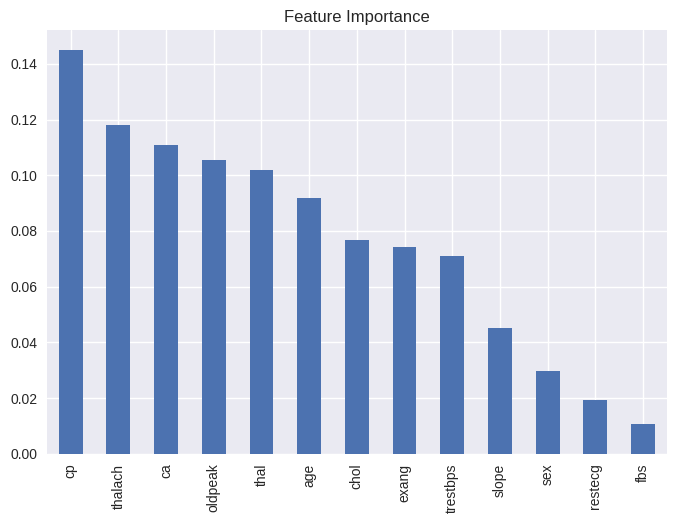

In [20]:
importances = rf_model.named_steps['model'].feature_importances_
feat_names = num_cols + cat_cols  # بعد میں one-hot column names کے ساتھ adjust کریں
fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
fi.plot(kind='bar', title='Feature Importance')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
}

grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [22]:
import joblib
joblib.dump(rf_model, "heart_rf_model.joblib")

['heart_rf_model.joblib']

In [23]:
loaded_model = joblib.load("heart_rf_model.joblib")
sample_pred = loaded_model.predict(X_test.iloc[[0]])

In [24]:
import joblib
loaded_model = joblib.load("heart_rf_model.joblib")

In [25]:
import joblib
model = joblib.load("heart_rf_model.joblib")

In [30]:
import streamlit as st
st.title('Heart Disease Prediction App')

2025-11-15 09:53:28.771 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:28.977 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-15 09:53:28.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:28.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

**Reasoning**:
The previous attempt failed because the `streamlit` library was not installed. I will install `streamlit` using `!pip install` to resolve this `ModuleNotFoundError`.



In [29]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.7 MB/s eta 0:00:00


**Reasoning**:
The `streamlit` library has been successfully installed. Now, I will re-run the code to import `streamlit` and set the application title, which should resolve the previous `ModuleNotFoundError` and complete the subtask.



In [31]:
import streamlit as st
st.title('Heart Disease Prediction App')

2025-11-15 09:53:39.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:39.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:39.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

**Reasoning**:
The previous step successfully set the Streamlit application title. The next logical step, according to the task description, is to define the UI elements. I will create input fields for each of the 13 heart disease features, using appropriate Streamlit widgets and reasonable ranges, and organize them within a sidebar.



In [32]:
import pandas as pd
import streamlit as st

def user_input_features():
    st.sidebar.header('User Input Features')

    age = st.sidebar.slider('Age', 29, 77, 50)

    sex_options = {'Male': 1, 'Female': 0}
    sex_display = st.sidebar.selectbox('Sex', list(sex_options.keys()))
    sex = sex_options[sex_display]

    cp_options = {
        'Typical Angina': 0,
        'Atypical Angina': 1,
        'Non-anginal Pain': 2,
        'Asymptomatic': 3
    }
    cp_display = st.sidebar.selectbox('Chest Pain Type', list(cp_options.keys()))
    cp = cp_options[cp_display]

    trestbps = st.sidebar.slider('Resting Blood Pressure (trestbps)', 90, 200, 120)
    chol = st.sidebar.slider('Serum Cholestoral (chol) in mg/dl', 100, 600, 230)

    fbs_options = {'True (> 120 mg/dl)': 1, 'False (<= 120 mg/dl)': 0}
    fbs_display = st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl (fbs)', list(fbs_options.keys()))
    fbs = fbs_options[fbs_display]

    restecg_options = {
        'Normal': 0,
        'ST-T wave abnormality': 1,
        'Left ventricular hypertrophy': 2
    }
    restecg_display = st.sidebar.selectbox('Resting Electrocardiographic Results (restecg)', list(restecg_options.keys()))
    restecg = restecg_options[restecg_display]

    thalach = st.sidebar.slider('Maximum Heart Rate Achieved (thalach)', 70, 220, 150)

    exang_options = {'Yes': 1, 'No': 0}
    exang_display = st.sidebar.selectbox('Exercise Induced Angina (exang)', list(exang_options.keys()))
    exang = exang_options[exang_display]

    oldpeak = st.sidebar.slider('ST depression induced by exercise relative to rest (oldpeak)', 0.0, 6.2, 1.0, 0.1)

    slope_options = {
        'Upsloping': 0,
        'Flat': 1,
        'Downsloping': 2
    }
    slope_display = st.sidebar.selectbox('The slope of the peak exercise ST segment (slope)', list(slope_options.keys()))
    slope = slope_options[slope_display]

    ca = st.sidebar.slider('Number of major vessels (0-3) colored by flourosopy (ca)', 0, 4, 0)

    thal_options = {
        'Normal': 1,
        'Fixed Defect': 2,
        'Reversible Defect': 3,
        'Unknown/0': 0 # Handling potential '0' as an unknown or missing type
    }
    thal_display = st.sidebar.selectbox('Thalassemia (thal)', list(thal_options.keys()))
    thal = thal_options[thal_display]

    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }
    features = pd.DataFrame(data, index=[0])
    return features

# Call the function to display the sidebar inputs and get the dataframe
input_df = user_input_features()

st.subheader('User Input features')
st.write(input_df)


2025-11-15 09:53:43.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:53:43.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous code block successfully defined the `user_input_features` function and demonstrated its output. The next step is to use the loaded model to make predictions based on the user's input, which is now available in `input_df`.



In [ ]:
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

st.subheader('Prediction')
heart_disease_status = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
st.write(f'Based on your inputs, the prediction is: **{heart_disease_status}**')

st.subheader('Prediction Probability')
st.write(f'Probability of No Heart Disease: **{prediction_proba[0][0]:.2f}**')
st.write(f'Probability of Heart Disease: **{prediction_proba[0][1]:.2f}**')

2025-11-15 07:12:59.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:12:59.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The 'missing ScriptRunContext!' warnings indicate that Streamlit functions are being called outside of a proper Streamlit execution environment. To create a functional Streamlit application, all Streamlit-related code (model loading, UI definition, prediction logic, and result display) needs to be consolidated into a single Python script. I will create a complete script named `app.py` that includes all necessary components and then demonstrate how to run it as a Streamlit app using a shell command within the Colab environment, which will address the execution context issue.



In [ ]:
import streamlit as st
import pandas as pd
import joblib

# 1. Load the saved model
model = joblib.load('heart_rf_model.joblib')

# 2. Set up the basic structure for a Streamlit application
st.title('Heart Disease Prediction App')

# 3. Define UI Elements
def user_input_features():
    st.sidebar.header('User Input Features')

    age = st.sidebar.slider('Age', 29, 77, 50)

    sex_options = {'Male': 1, 'Female': 0}
    sex_display = st.sidebar.selectbox('Sex', list(sex_options.keys()))
    sex = sex_options[sex_display]

    cp_options = {
        'Typical Angina': 0,
        'Atypical Angina': 1,
        'Non-anginal Pain': 2,
        'Asymptomatic': 3
    }
    cp_display = st.sidebar.selectbox('Chest Pain Type', list(cp_options.keys()))
    cp = cp_options[cp_display]

    trestbps = st.sidebar.slider('Resting Blood Pressure (trestbps)', 90, 200, 120)
    chol = st.sidebar.slider('Serum Cholestoral (chol) in mg/dl', 100, 600, 230)

    fbs_options = {'True (> 120 mg/dl)': 1, 'False (<= 120 mg/dl)': 0}
    fbs_display = st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl (fbs)', list(fbs_options.keys()))
    fbs = fbs_options[fbs_display]

    restecg_options = {
        'Normal': 0,
        'ST-T wave abnormality': 1,
        'Left ventricular hypertrophy': 2
    }
    restecg_display = st.sidebar.selectbox('Resting Electrocardiographic Results (restecg)', list(restecg_options.keys()))
    restecg = restecg_options[restecg_display]

    thalach = st.sidebar.slider('Maximum Heart Rate Achieved (thalach)', 70, 220, 150)

    exang_options = {'Yes': 1, 'No': 0}
    exang_display = st.sidebar.selectbox('Exercise Induced Angina (exang)', list(exang_options.keys()))
    exang = exang_options[exang_display]

    oldpeak = st.sidebar.slider('ST depression induced by exercise relative to rest (oldpeak)', 0.0, 6.2, 1.0, 0.1)

    slope_options = {
        'Upsloping': 0,
        'Flat': 1,
        'Downsloping': 2
    }
    slope_display = st.sidebar.selectbox('The slope of the peak exercise ST segment (slope)', list(slope_options.keys()))
    slope = slope_options[slope_display]

    ca = st.sidebar.slider('Number of major vessels (0-3) colored by flourosopy (ca)', 0, 4, 0)

    thal_options = {
        'Normal': 1,
        'Fixed Defect': 2,
        'Reversible Defect': 3,
        'Unknown/0': 0 # Handling potential '0' as an unknown or missing type
    }
    thal_display = st.sidebar.selectbox('Thalassemia (thal)', list(thal_options.keys()))
    thal = thal_options[thal_display]

    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }
    features = pd.DataFrame(data, index=[0])
    return features

# Call the function to display the sidebar inputs and get the dataframe
input_df = user_input_features()

st.subheader('User Input features')
st.write(input_df)

# 4. Process inputs and predict
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# 5. Display result
st.subheader('Prediction')
heart_disease_status = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
st.write(f'Based on your inputs, the prediction is: **{heart_disease_status}**')

st.subheader('Prediction Probability')
st.write(f'Probability of No Heart Disease: **{prediction_proba[0][0]:.2f}**')
st.write(f'Probability of Heart Disease: **{prediction_proba[0][1]:.2f}**')

2025-11-15 07:13:18.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 07:13:18.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous code block contains the complete Streamlit application logic. To run this as a Streamlit app and resolve the `missing ScriptRunContext!` warnings, I need to save the code to a Python file (`app.py`) and then execute it using a shell command. This is the final step to make the Streamlit application functional.



In [33]:
import streamlit as st
import pandas as pd
import joblib

# 1. Load the saved model
model = joblib.load('heart_rf_model.joblib')

# 2. Set up the basic structure for a Streamlit application
st.title('Heart Disease Prediction App')

# 3. Define UI Elements
def user_input_features():
    st.sidebar.header('User Input Features')

    age = st.sidebar.slider('Age', 29, 77, 50)

    sex_options = {'Male': 1, 'Female': 0}
    sex_display = st.sidebar.selectbox('Sex', list(sex_options.keys()))
    sex = sex_options[sex_display]

    cp_options = {
        'Typical Angina': 0,
        'Atypical Angina': 1,
        'Non-anginal Pain': 2,
        'Asymptomatic': 3
    }
    cp_display = st.sidebar.selectbox('Chest Pain Type', list(cp_options.keys()))
    cp = cp_options[cp_display]

    trestbps = st.sidebar.slider('Resting Blood Pressure (trestbps)', 90, 200, 120)
    chol = st.sidebar.slider('Serum Cholestoral (chol) in mg/dl', 100, 600, 230)

    fbs_options = {'True (> 120 mg/dl)': 1, 'False (<= 120 mg/dl)': 0}
    fbs_display = st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl (fbs)', list(fbs_options.keys()))
    fbs = fbs_options[fbs_display]

    restecg_options = {
        'Normal': 0,
        'ST-T wave abnormality': 1,
        'Left ventricular hypertrophy': 2
    }
    restecg_display = st.sidebar.selectbox('Resting Electrocardiographic Results (restecg)', list(restecg_options.keys()))
    restecg = restecg_options[restecg_display]

    thalach = st.sidebar.slider('Maximum Heart Rate Achieved (thalach)', 70, 220, 150)

    exang_options = {'Yes': 1, 'No': 0}
    exang_display = st.sidebar.selectbox('Exercise Induced Angina (exang)', list(exang_options.keys()))
    exang = exang_options[exang_display]

    oldpeak = st.sidebar.slider('ST depression induced by exercise relative to rest (oldpeak)', 0.0, 6.2, 1.0, 0.1)

    slope_options = {
        'Upsloping': 0,
        'Flat': 1,
        'Downsloping': 2
    }
    slope_display = st.sidebar.selectbox('The slope of the peak exercise ST segment (slope)', list(slope_options.keys()))
    slope = slope_options[slope_display]

    ca = st.sidebar.slider('Number of major vessels (0-3) colored by flourosopy (ca)', 0, 4, 0)

    thal_options = {
        'Normal': 1,
        'Fixed Defect': 2,
        'Reversible Defect': 3,
        'Unknown/0': 0 # Handling potential '0' as an unknown or missing type
    }
    thal_display = st.sidebar.selectbox('Thalassemia (thal)', list(thal_options.keys()))
    thal = thal_options[thal_display]

    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }
    features = pd.DataFrame(data, index=[0])
    return features

# Call the function to display the sidebar inputs and get the dataframe
input_df = user_input_features()

st.subheader('User Input features')
st.write(input_df)

# 4. Process inputs and predict
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# 5. Display result
st.subheader('Prediction')
heart_disease_status = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
st.write(f'Based on your inputs, the prediction is: **{heart_disease_status}**')

st.subheader('Prediction Probability')
st.write(f'Probability of No Heart Disease: **{prediction_proba[0][0]:.2f}**')
st.write(f'Probability of Heart Disease: **{prediction_proba[0][1]:.2f}**')

2025-11-15 09:54:08.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 09:54:08.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
To create a functional Streamlit application that can be run from the command line and avoid `ScriptRunContext` errors, I need to save the complete Streamlit code into a Python file named `app.py`. The `%%writefile` magic command is used for this purpose in Colab.



In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# 1. Load the saved model
model = joblib.load('heart_rf_model.joblib')

# 2. Set up the basic structure for a Streamlit application
st.title('Heart Disease Prediction App')

# 3. Define UI Elements
def user_input_features():
    st.sidebar.header('User Input Features')

    age = st.sidebar.slider('Age', 29, 77, 50)

    sex_options = {'Male': 1, 'Female': 0}
    sex_display = st.sidebar.selectbox('Sex', list(sex_options.keys()))
    sex = sex_options[sex_display]

    cp_options = {
        'Typical Angina': 0,
        'Atypical Angina': 1,
        'Non-anginal Pain': 2,
        'Asymptomatic': 3
    }
    cp_display = st.sidebar.selectbox('Chest Pain Type', list(cp_options.keys()))
    cp = cp_options[cp_display]

    trestbps = st.sidebar.slider('Resting Blood Pressure (trestbps)', 90, 200, 120)
    chol = st.sidebar.slider('Serum Cholestoral (chol) in mg/dl', 100, 600, 230)

    fbs_options = {'True (> 120 mg/dl)': 1, 'False (<= 120 mg/dl)': 0}
    fbs_display = st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl (fbs)', list(fbs_options.keys()))
    fbs = fbs_options[fbs_display]

    restecg_options = {
        'Normal': 0,
        'ST-T wave abnormality': 1,
        'Left ventricular hypertrophy': 2
    }
    restecg_display = st.sidebar.selectbox('Resting Electrocardiographic Results (restecg)', list(restecg_options.keys()))
    restecg = restecg_options[restecg_display]

    thalach = st.sidebar.slider('Maximum Heart Rate Achieved (thalach)', 70, 220, 150)

    exang_options = {'Yes': 1, 'No': 0}
    exang_display = st.sidebar.selectbox('Exercise Induced Angina (exang)', list(exang_options.keys()))
    exang = exang_options[exang_display]

    oldpeak = st.sidebar.slider('ST depression induced by exercise relative to rest (oldpeak)', 0.0, 6.2, 1.0, 0.1)

    slope_options = {
        'Upsloping': 0,
        'Flat': 1,
        'Downsloping': 2
    }
    slope_display = st.sidebar.selectbox('The slope of the peak exercise ST segment (slope)', list(slope_options.keys()))
    slope = slope_options[slope_display]

    ca = st.sidebar.slider('Number of major vessels (0-3) colored by flourosopy (ca)', 0, 4, 0)

    thal_options = {
        'Normal': 1,
        'Fixed Defect': 2,
        'Reversible Defect': 3,
        'Unknown/0': 0 # Handling potential '0' as an unknown or missing type
    }
    thal_display = st.sidebar.selectbox('Thalassemia (thal)', list(thal_options.keys()))
    thal = thal_options[thal_display]

    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }
    features = pd.DataFrame(data, index=[0])
    return features

# Call the function to display the sidebar inputs and get the dataframe
input_df = user_input_features()

st.subheader('User Input features')
st.write(input_df)

# 4. Process inputs and predict
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# 5. Display result
st.subheader('Prediction')
heart_disease_status = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
st.write(f'Based on your inputs, the prediction is: **{heart_disease_status}**')

st.subheader('Prediction Probability')
st.write(f'Probability of No Heart Disease: **{prediction_proba[0][0]:.2f}**')
st.write(f'Probability of Heart Disease: **{prediction_proba[0][1]:.2f}**')

Writing app.py


**Reasoning**:
The Streamlit application code has been saved to `app.py`. To run this application and make it accessible, I need to execute it using `streamlit run app.py` within the Colab environment. I will also use `nohup` to allow the process to run in the background and `&` to return control to the shell, followed by a sleep command to give Streamlit time to start. Finally, `npx localtunnel --port 8501` will create a publicly accessible URL for the Streamlit app.



In [35]:
import subprocess

# Run Streamlit in the background
!nohup streamlit run app.py &

# Give Streamlit a moment to start up
import time
time.sleep(5)

# Use localtunnel to expose the Streamlit port (8501 by default)
print('Your Streamlit app will be available at the public URL provided by localtunnel. Please wait for a few moments.')
process = subprocess.Popen(['npx', 'localtunnel', '--port', '8501'], stdout=subprocess.PIPE, text=True)
for line in process.stdout:
    print(line.strip())
    if 'your url is:' in line:
        break


nohup: appending output to 'nohup.out'
Your Streamlit app will be available at the public URL provided by localtunnel. Please wait for a few moments.
your url is: https://rich-stars-float.loca.lt
